In [1]:
using PyPlot
pygui(true)


true

In [16]:
PyPlot.rcdefaults() # reset to default
PyPlot.close("all")

# Set global plotting parameters for PyPlot.jl
PyPlot.rc("font", size=12)      #family="serif",
# PyPlot.rc("axes", titlesize=18, labelsize=16)
# PyPlot.rc("xtick", labelsize=12)
# PyPlot.rc("ytick", labelsize=12)
PyPlot.rc("lines", linewidth=1.5)
size_py = 0.393701*[20, 15]     # figure size
size_py_wide = 0.393701*[20, 8]# figure size in cm
res = 300                       # figure resolution (dpi)

300

In [67]:
# Import necessary packages
using Luna
using LaTeXStrings
using FFTW
using DelimitedFiles
using FFTW
using DSP
using Polynomials
include(joinpath(pwd(), "MPC_functions.jl"))


reflecting_mirror2! (generic function with 1 method)

In [4]:
# useful function for finding the indices for phase blanking manually
function find_closest_index(array, value)
    differences = abs.(array .- value)
    return argmin(differences)
end

find_closest_index (generic function with 1 method)

Plot retrieved pulse that was in Anas matlap folder

In [90]:
# What to plot                  
file_FROG_pulse = joinpath("input", "tangerine_FROG_50kHz") #joinpath("input", "20220505_retrievedpulse.txt")

"input\\tangerine_FROG_50kHz"

In [114]:
# READ IN AND PREPARE FROG DATA 
data = readdlm(joinpath(file_FROG_pulse, "Speck.dat"))

λdat = data[:,1]     # read in wavelengths [nm]
indices = findall(x -> x >= 0, λdat)     # cut off negative wavelengths
λdat = λdat[indices]
ωdat = PhysData.wlfreq.(λdat*1e-9)  # calculate angular frequencies 

Eω_real = data[indices,4]   # read in real part of complex field
Eω_imag = data[indices,5]   # read in imaginary part of complex field
Eω_complex = Eω_real .+ 1im.*Eω_imag   # combine real and imaginary part

2048-element Vector{ComplexF64}:
  2.166836e-7 - 1.099222e-5im
 -7.673126e-6 - 8.040998e-6im
 -1.117215e-5 - 5.355138e-7im
 -8.284801e-6 + 7.234664e-6im
 -6.667745e-7 + 1.08525e-5im
  7.324439e-6 + 8.284701e-6im
  1.112237e-5 + 1.024267e-6im
  8.561451e-6 - 6.777597e-6im
  1.112106e-6 - 1.068534e-5im
 -6.963515e-6 - 8.501075e-6im
              ⋮
  7.338507e-6 - 8.527693e-6im
 -6.938805e-7 - 1.118905e-5im
 -8.328381e-6 - 7.476791e-6im
 -1.120211e-5 + 4.690978e-7im
 -7.674283e-6 + 8.110853e-6im
  2.365965e-7 + 1.110511e-5im
   8.00784e-6 + 7.772078e-6im
  1.119877e-5 + 3.775467e-8im
   7.98884e-6 - 7.679152e-6im

In [92]:
ϕω = blank_phase(ωdat, abs2.(Eω_complex), unwrap(angle.(Eω_complex)); level=0.05)

2048-element Vector{Float64}:
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
   ⋮
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN

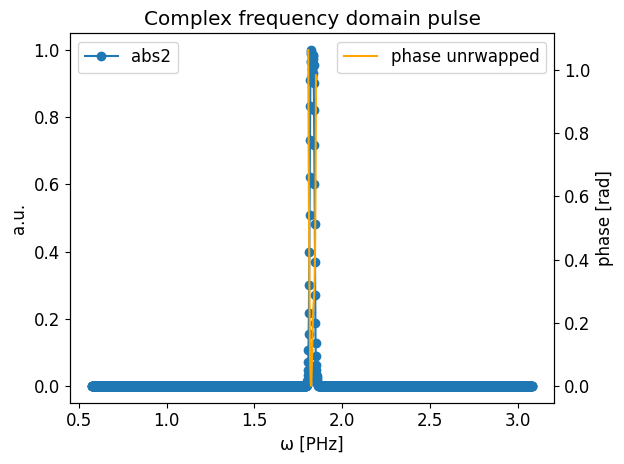

In [93]:
# Plot complex spectral field

fig, ax1 = plt.subplots()
ax1.set_title("Complex frequency domain pulse")
ax1.plot(ωdat.*1e-15, abs2.(Eω_complex), label="abs2", marker="o")
#ax1.plot(ωdat.*1e-15, real.(Eω_complex), label="real", marker="o")
#ax1.plot(ωdat.*1e-15, imag.(Eω_complex), label="imaginary", marker="o")
ax2 = ax1.twinx()
#ax2.plot(ωdat[idx_min:idx_max].*1e-15, angle.(Eω_complex[idx_min:idx_max]), label="phase", color="orange")
ax2.plot(ωdat.*1e-15, ϕω, label="phase unrwapped", color="orange")
#ax1.set_xlim(-500, 500)
ax1.set_xlabel("ω [PHz]")
ax1.set_ylabel("a.u.")
ax2.set_ylabel("phase [rad]")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.tight_layout()
# plt.show()
plt.gcf()

In [ ]:
# Plot complex spectral field

fig, ax1 = plt.subplots()
# ax1.set_title("Complex frequency domain pulse")
# ax1.plot(λdat, abs2.(Eω_complex), label="abs2", color="C0")
ax1.plot(λdat, real.(Eω_complex), label="real", marker="o")
# ax1.plot(λdat, imag.(Eω_complex), label="imaginary", marker="o")
ax2 = ax1.twinx()
#ax2.plot(λdat, angle.(Eω_complex[idx_min:idx_max]), label="phase", color="orange")
# ax2.plot(λdat, ϕω, label="phase unrwapped", color="orange")

ax1.set_ylabel("Intensity [norm.]", color="C0")
ax1.tick_params(axis="y", labelcolor="C0")

ax2.set_ylabel("ϕω [rad]", color="C1")
ax2.tick_params(axis="y", labelcolor="C1")

ax1.set_xlim(1000, 1060)
ax1.set_xlabel("λ [nm]")
# ax1.legend(loc="upper left")
# ax2.legend(loc="upper right")
plt.tight_layout()
# plt.show()
# plt.savefig(joinpath("@__DIR__", "..", "..", "..", "thesis", "FROG_spectrum.png"), dpi=300, bbox_inches="tight")
plt.gcf()



DimensionMismatch: DimensionMismatch: arrays could not be broadcast to a common size; got a dimension with lengths 2048 and 512

In [95]:
# READ IN AND PREPARE FROG DATA 
data = readdlm(joinpath(file_FROG_pulse, "Ek.dat"))

tdat = data[:,1]     # read in wavelengths [nm]

Et_real = data[:,4]   # read in real part of complex field
Et_imag = data[:,5]   # read in imaginary part of complex field
Et_complex = Et_real .+ 1im.*Et_imag   # combine real and imaginary part

512-element Vector{ComplexF64}:
  -9.973669e-5 + 0.0001640537im
  0.0002380419 + 0.0005792661im
  -2.095079e-5 + 0.0002226907im
 -0.0006680059 + 0.0003704588im
  -5.277373e-5 + 0.0003439217im
   2.259151e-5 + 0.0007857231im
 -0.0002546567 + 0.0005174507im
   7.859195e-6 + 0.0006940606im
  -7.893558e-6 + 0.0007169726im
   7.253425e-5 + 0.000659909im
               ⋮
  -3.413289e-5 + 7.668007e-6im
  -3.445928e-5 - 3.994276e-6im
  -2.569598e-5 + 1.838654e-5im
  -9.132991e-5 - 3.410405e-5im
    -6.7767e-5 - 7.04724e-5im
  -5.742107e-5 + 2.481113e-5im
  -6.497258e-5 + 6.274842e-6im
 -0.0001780925 - 0.0001021088im
 -0.0001760709 - 9.013736e-5im

In [99]:
ϕt = blank_phase(tdat, abs2.(Et_complex), unwrap(angle.(Et_complex)); level=0.05)

512-element Vector{Float64}:
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
   ⋮
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN

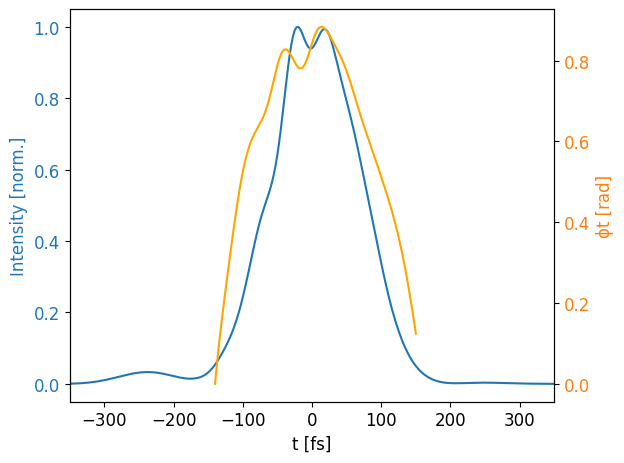

In [100]:
# Plot complex temporal field

fig, ax1 = plt.subplots()
# ax1.set_title("Complex time domain pulse")
ax1.plot(tdat, abs2.(Et_complex), label="abs2", color="C0")
#ax1.plot(tdat, real.(Et_complex), label="real", marker="o")
#ax1.plot(tdat, imag.(Et_complex), label="imaginary", marker="o")
ax2 = ax1.twinx()
#ax2.plot(tdat, angle.(Et_complex[idx_min:idx_max]), label="phase", color="orange")
ax2.plot(tdat, ϕt, label="phase unrwapped", color="orange")

ax1.set_ylabel("Intensity [norm.]", color="C0")
ax1.tick_params(axis="y", labelcolor="C0")

ax2.set_ylabel("ϕt [rad]", color="C1")
ax2.tick_params(axis="y", labelcolor="C1")

ax1.set_xlim(-350, 350)
ax1.set_xlabel("t [fs]")
# ax1.legend(loc="upper left")
# ax2.legend(loc="upper right")
plt.tight_layout()
# plt.show()
plt.savefig(joinpath("@__DIR__", "..", "..", "..", "thesis", "FROG_pulse.png"), dpi=300, bbox_inches="tight")
plt.gcf()

In [98]:
# read in relevant data
# FROG_pulse contains 4 columns: time, real part, complex part and absolute value of the complex temporal field

data, header = readdlm(file_FROG_pulse, '\t', header=true)

t = data[:,1]     # read in time axis
println(length(t))

E_real = data[:,2]   # read in real part of complex field
E_imag = data[:,3]   # read in imaginary part of complex field
println(length(E_real))

E_complex = E_real .+ 1im.*E_imag
println(length(E_complex))

ArgumentError: ArgumentError: Cannot open 'input\tangerine_FROG_50kHz': not a file

In [7]:
# Indices where to blank temporal phase
idx_min = findfirst(x -> x == -400e-15, t)
idx_max = findfirst(x -> x == 400e-15, t)

421

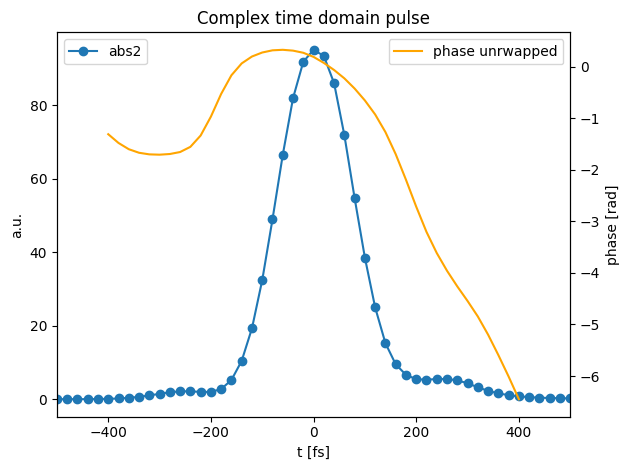

In [8]:
# Plot complex temporal field

fig, ax1 = plt.subplots()
ax1.set_title("Complex time domain pulse")
ax1.plot(t.*1e15, abs2.(E_complex), label="abs2", marker="o")
#ax1.plot(t.*1e15, real.(E_complex), label="real", marker="o")
#ax1.plot(t.*1e15, imag.(E_complex), label="imaginary", marker="o")
ax2 = ax1.twinx()
#ax2.plot(t[idx_min:idx_max].*1e15, angle.(E_complex[idx_min:idx_max]), label="phase", color="orange")
ax2.plot(t[idx_min:idx_max].*1e15, unwrap(angle.(E_complex[idx_min:idx_max])), label="phase unrwapped", color="orange")
ax1.set_xlim(-500, 500)
ax1.set_xlabel("t [fs]")
ax1.set_ylabel("a.u.")
ax2.set_ylabel("phase [rad]")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.tight_layout()
# plt.show()
display(gcf())

In [9]:
# Do fft of the temporal field and define frequency axis

f = collect(fftshift(fftfreq(length(t), 1/(t[2]-t[1]))))
ω = 2*pi.*f
println(length(f))
println(length(ω))

Eω = fftshift(fft(ifftshift(E_complex)))

800
800


800-element Vector{ComplexF64}:
  -0.01109535146791224 - 0.047808340770192304im
  0.009651298114507762 - 0.033902172484535156im
  0.029598288870458195 - 0.010890313241638553im
   0.04258847352633958 + 0.014332376984767128im
  0.044046780314469125 + 0.034483959613692335im
   0.03313236974091299 + 0.04417402268966037im
   0.01321633553175935 + 0.041611388412265915im
 -0.009766615563527387 + 0.029004549232136856im
  -0.02983577807667278 + 0.011198526287133227im
  -0.04258952794526828 - 0.006718834924340715im
                       ⋮
  0.018798386734717645 + 0.023437133483162242im
   0.02118324451260384 + 0.03240706099507949im
  0.017506609970635773 + 0.037898911917962776im
  0.006462401672072756 + 0.03721696358355323im
 -0.009198804882843682 + 0.027626071652893228im
 -0.024317091981606052 + 0.009153357548140527im
  -0.03400251451754715 - 0.014232731252100677im
  -0.03524992728535037 - 0.03574516254913703im
  -0.02720598169300427 - 0.04839991472707677im

In [10]:
# Indices where to blank spectral phase
idx_min = findfirst(x -> x > -0.03e15, ω)
idx_max = findfirst(x -> x > 0.03e15, ω)
println(idx_min, idx_max)

325478


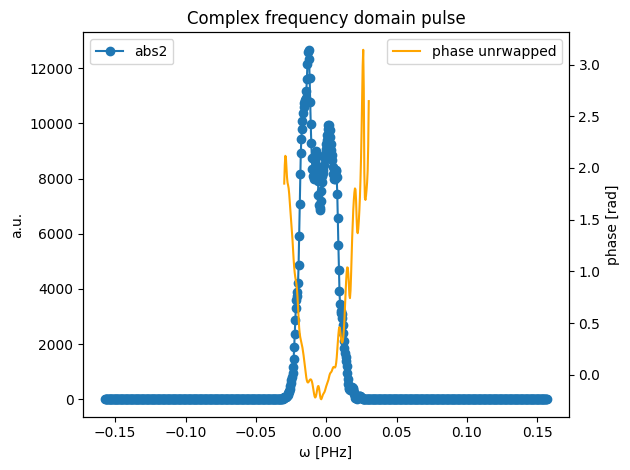

In [11]:
# Plot complex spectral field

fig, ax1 = plt.subplots()
ax1.set_title("Complex frequency domain pulse")
ax1.plot(ω.*1e-15, abs2.(Eω), label="abs2", marker="o")
#ax1.plot(ω.*1e-15, real.(Eω), label="real", marker="o")
#ax1.plot(ω.*1e-15, imag.(Eω), label="imaginary", marker="o")
ax2 = ax1.twinx()
#ax2.plot(ω[idx_min:idx_max].*1e-15, angle.(Eω[idx_min:idx_max]), label="phase", color="orange")
ax2.plot(ω[idx_min:idx_max].*1e-15, unwrap(angle.(Eω[idx_min:idx_max])), label="phase unrwapped", color="orange")
#ax1.set_xlim(-500, 500)
ax1.set_xlabel("ω [PHz]")
ax1.set_ylabel("a.u.")
ax2.set_ylabel("phase [rad]")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.tight_layout()
# plt.show()
display(gcf())

Now plot Tangerine FROG

In [13]:
#dir = "tangerine_FROG_1kHz"
dir = joinpath("input", "tangerine_FROG_50kHz")


file_FROG_Et = "Ek.dat"

file_FROG_Eω = "Speck.dat"
path_FROG_Eω = joinpath(dir, file_FROG_Eω)

"input\\tangerine_FROG_50kHz\\Speck.dat"

In [14]:
data = readdlm(path_FROG_Eω)

# READ IN WAVELENGTHS AND CUT OFF NEGATIVE WAVELENGTHS
λ = data[:,1]     # read in wavelength
println("size(λ): ",size(λ))

indices = findall(x -> x >= 0, λ)     # omit negative wavelengths
λ = λ[indices]
println("size(λ): ",size(λ))

# CALCULATE FREQUENCY AXIS
f = @. PhysData.c/(λ*1e-9)
ω = 2*pi.*f

# READ IN COMPLEX FROG SPECTRUM
E_real = data[indices,4]   # read in real part of complex field
E_imag = data[indices,5]   # read in imaginary part of complex field

Eω = E_real .+ 1im.*E_imag

size(λ): (2048,)
size(λ): (2048,)


2048-element Vector{ComplexF64}:
  2.166836e-7 - 1.099222e-5im
 -7.673126e-6 - 8.040998e-6im
 -1.117215e-5 - 5.355138e-7im
 -8.284801e-6 + 7.234664e-6im
 -6.667745e-7 + 1.08525e-5im
  7.324439e-6 + 8.284701e-6im
  1.112237e-5 + 1.024267e-6im
  8.561451e-6 - 6.777597e-6im
  1.112106e-6 - 1.068534e-5im
 -6.963515e-6 - 8.501075e-6im
              ⋮
  7.338507e-6 - 8.527693e-6im
 -6.938805e-7 - 1.118905e-5im
 -8.328381e-6 - 7.476791e-6im
 -1.120211e-5 + 4.690978e-7im
 -7.674283e-6 + 8.110853e-6im
  2.365965e-7 + 1.110511e-5im
   8.00784e-6 + 7.772078e-6im
  1.119877e-5 + 3.775467e-8im
   7.98884e-6 - 7.679152e-6im

In [15]:
# Indices where to blank spectral phase
idx_min = findfirst(x -> x > 1.79e15, ω)
idx_max = findfirst(x -> x > 1.84e15, ω)
println(idx_min, idx_max)

9941035


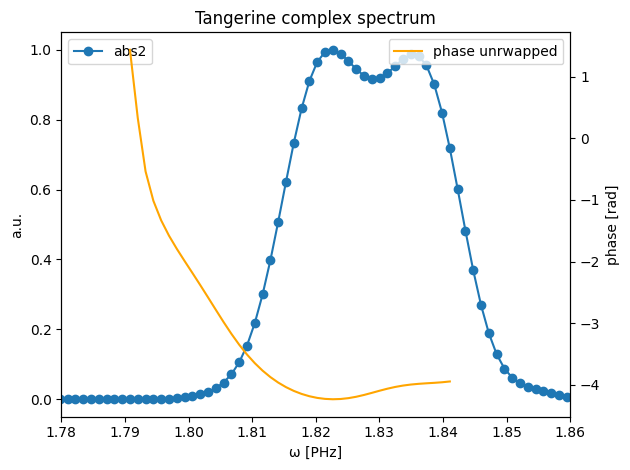

In [16]:
# Plot complex spectral field

fig, ax1 = plt.subplots()
ax1.set_title("Tangerine complex spectrum")
ax1.plot(ω.*1e-15, abs2.(Eω), label="abs2", marker="o")
#ax1.plot(ω.*1e-15, real.(Eω), label="real", marker="o")
#ax1.plot(ω.*1e-15, imag.(Eω), label="imaginary", marker="o")
ax2 = ax1.twinx()
#ax2.plot(ω[idx_min:idx_max].*1e-15, angle.(Eω[idx_min:idx_max]), label="phase", color="orange")
ax2.plot(ω[idx_min:idx_max].*1e-15, unwrap(angle.(Eω[idx_min:idx_max])), label="phase unrwapped", color="orange")
ax1.set_xlim(1.78, 1.86)
ax1.set_xlabel("ω [PHz]")
ax1.set_ylabel("a.u.")
ax2.set_ylabel("phase [rad]")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.tight_layout()
# plt.show()
display(gcf())

In [17]:
# Indices where to blank spectral phase
idx_max = find_closest_index(λ, 1010)
idx_min = find_closest_index(λ, 1050)

println(idx_min,"\n", idx_max)

997
1055


In [42]:
fwhm = Maths.fwhm(λ, abs2.(Eω); method=:nearest, minmax=:min)

2676.1744

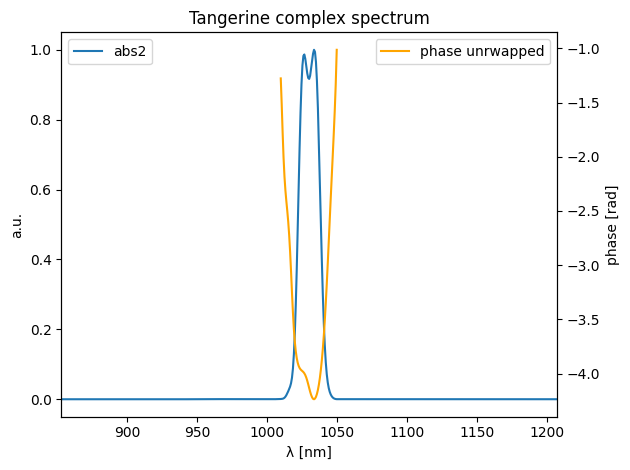

In [36]:
# Plot complex spectrum

fig, ax1 = plt.subplots()
ax1.set_title("Tangerine complex spectrum")
ax1.plot(λ, abs2.(Eω), label="abs2")#, marker="o")
#ax1.plot(λ, real.(Eω), label="real", marker="o")
#ax1.plot(λ, imag.(Eω), label="imaginary", marker="o")
ax2 = ax1.twinx()
#ax2.plot(λ[idx_max:idx_min], angle.(Eω[idx_max:idx_min]), label="phase", color="orange")
ax2.plot(λ[idx_min:idx_max], unwrap(angle.(Eω[idx_min:idx_max])), label="phase unrwapped", color="orange")
ax1.set_xlim(1030-2*fwhm, 1030+2*fwhm) #(1000, 1060)
ax1.set_xlabel("λ [nm]")
ax1.set_ylabel("a.u.")
ax2.set_ylabel("phase [rad]")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.tight_layout()
# plt.show()
display(gcf())

88.62847090785272

MPC measured spectrum\
50 kHz repetition rate\
1.5 bar of Kr\
15 round trips\

In [20]:
file_MPC_spectrum = joinpath("input", "MPC_measured_spectra_2024-10-25", "Spectrum", "Spectrum before fibre at 50kHz.txt")

num_header_lines = 14
#data = readdlm(file_MPC_spectrum, '\t', Float64, '\n', num_header_lines)
data = readdlm(file_MPC_spectrum, '\t', Float64, '\n', skipstart=14)

λ_exp = data[:, 1]
I_exp = data[:, 2]

2048-element Vector{Float64}:
 25.0
 28.0
 27.0
 24.0
 27.0
 33.0
 31.0
 25.0
 25.0
 29.0
  ⋮
 28.0
 28.0
 28.0
 29.0
 29.0
 32.0
 29.0
 28.0
 29.0

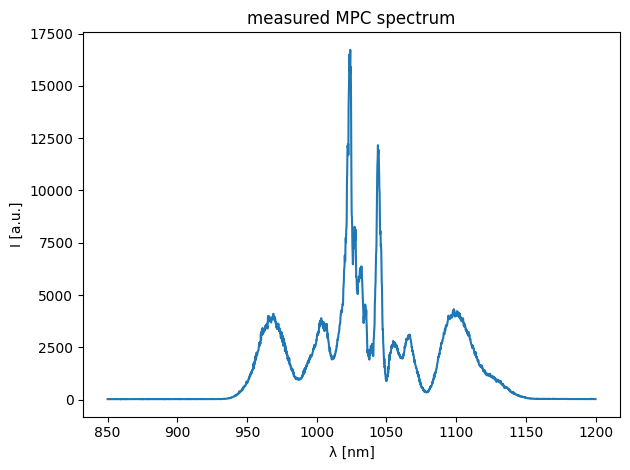

In [21]:
# Plotting measured MPC spectrum
plt.figure()
plt.title("measured MPC spectrum")
plt.plot(λ_exp, I_exp)
plt.xlabel("λ [nm]")
plt.ylabel("I [a.u.]")
plt.tight_layout()
# plt.show()
display(gcf())

Plot measured output Spectrum of the MPC with my simulation results

In [22]:
file_MPC_spectrum = joinpath("input", "MPC_measured_spectra_2024-10-25", "Spectrum", "Spectrum before fibre at 50kHz.txt")

num_header_lines = 14
#data = readdlm(file_MPC_spectrum, '\t', Float64, '\n', num_header_lines)
data = readdlm(file_MPC_spectrum, '\t', Float64, '\n', skipstart=14)

λ_exp = data[:, 1]
I_exp = data[:, 2]
I_exp ./= maximum(I_exp)


run = "run_2024_12_16__15_17_58_direct_-30fs2_GDD"
file_MPC_spectrum_sim = joinpath("output_sorted", "direct GDD", run , "output_spectrum.txt")

data = readdlm(file_MPC_spectrum_sim, '\t', Float64, '\n')

λ_sim = data[:, 1]
I_sim = data[:, 2]
I_sim ./= maximum(I_sim)

1024-element Vector{Float64}:
 2.046688564588101e-21
 2.167504669710736e-21
 2.3590276821696847e-21
 2.6074499983627354e-21
 2.8952457274658733e-21
 3.2027644409004377e-21
 3.510003370561535e-21
 3.798388379540761e-21
 4.052386658472661e-21
 4.2608079352128505e-21
 ⋮
 3.3492754007971526e-22
 2.650108828822963e-22
 2.0130385274291529e-22
 1.4505998668002392e-22
 9.739825795465094e-23
 5.92780819785854e-23
 3.1475075416305647e-23
 1.4560091341448566e-23
 8.882580199551299e-24

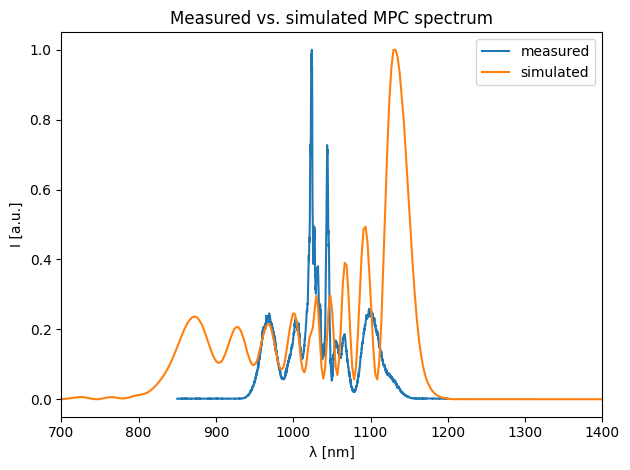

In [23]:
# Plotting measured MPC spectrum
plt.figure()
plt.title("Measured vs. simulated MPC spectrum")
plt.plot(λ_exp, I_exp, label="measured")
plt.plot(λ_sim, I_sim, label="simulated")
plt.xlabel("λ [nm]")
plt.ylabel("I [a.u.]")
plt.xlim(700, 1400)
plt.legend()
plt.tight_layout()
# plt.show()
display(gcf())

Comparing Continuous vs. split simulation with FROG pulse

In [24]:
file_cont = joinpath("input", "spectrum_sim_FROG.txt")
file_split = joinpath("input" , "spectrum_split_sim_FROG.txt")

data = readdlm(file_cont, Float64)

λ_cont = data[:, 1]
I_cont = data[:, 2]

data = readdlm(file_split, Float64)

λ_split = data[:, 1]
I_split = data[:, 2]

2112-element Vector{Float64}:
 0.4756382572469831
 0.48038085917560497
 0.4849949556428212
 0.48923067825686156
 0.49374133021421807
 0.49851612639836856
 0.5030354021444735
 0.5070896616462675
 0.5107974375268782
 0.5148376603402494
 ⋮
 1.6209145237013374
 1.5936952500156598
 1.566539673177495
 1.5400606164281903
 1.513513156496341
 1.4864734584865456
 1.4600024911684333
 1.4337936396265345
 1.407352381597082

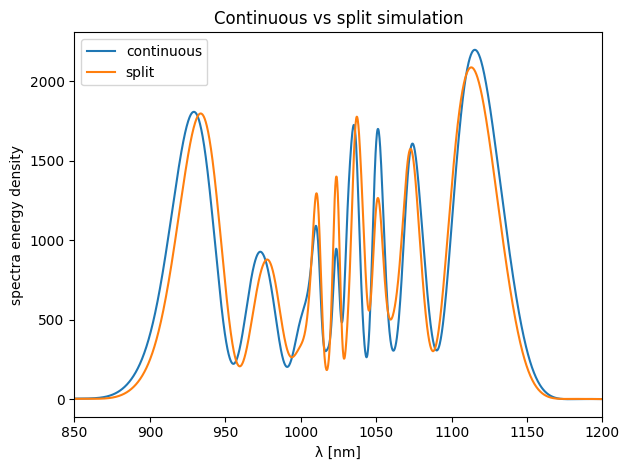

In [25]:
# Plotting continuous vs. split simulation
plt.figure()
plt.title("Continuous vs split simulation")
plt.plot(λ_cont, I_cont, label="continuous")
plt.plot(λ_split, I_split, label="split")
#plt.plot(λ_exp, I_exp, label="measured")
plt.xlabel("λ [nm]")
plt.ylabel("spectra energy density")
plt.xlim(850, 1200)
plt.legend()
plt.tight_layout()
# plt.show()
display(gcf())

Compare simulation of 30 passes with no reflectivity and GDD accounted for vs. measured spectrum

In [26]:
file_sim = joinpath("output", "run_2024_11_04__12_20_36", "output_spectrum.txt")

data = readdlm(file_sim, Float64)

λ_sim = data[:, 1]
I_sim = data[:, 2]

1024-element Vector{Float64}:
 3.3128675042582375e-7
 3.337092912613574e-7
 3.3703306392239653e-7
 3.4129142517239285e-7
 3.4605763480566826e-7
 3.5023309345733916e-7
 3.554048873190025e-7
 3.6089785617912255e-7
 3.660607260705076e-7
 3.7490000348460366e-7
 ⋮
 7.402167718363982e-6
 7.307587013213929e-6
 7.224186403128365e-6
 7.160493143818427e-6
 7.104618303737133e-6
 7.059886161674568e-6
 7.034057815829455e-6
 7.020189400713539e-6
 7.0146909489610755e-6

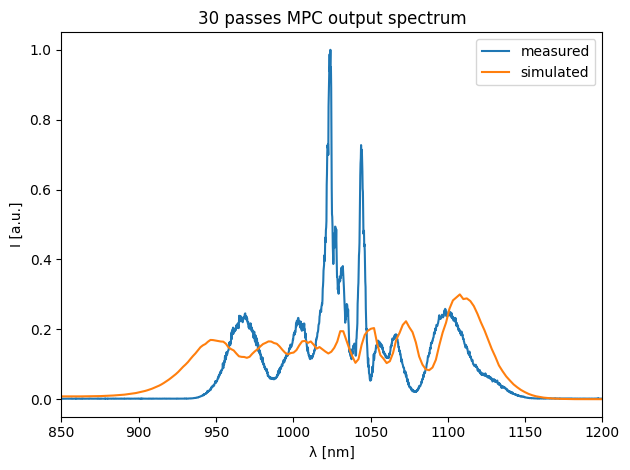

In [27]:
# Plotting simulated 30 passes vs. measured MPC spectrum
plt.figure()
plt.title("30 passes MPC output spectrum")
plt.plot(λ_exp, I_exp./maximum(I_exp), label="measured")
plt.plot(λ_sim, 0.3 .* I_sim./maximum(I_sim), label="simulated")
plt.xlim(850, 1200)
plt.xlabel("λ [nm]")
plt.ylabel("I [a.u.]")
plt.legend()
plt.tight_layout()
# plt.show()
display(gcf())

PLOTTING COMPLEX TIME DOMAIN FOR TWO DIFFERENT APPROACHES

In [28]:
# spectrum for 30 passes with no mirrors applied
in_dir = joinpath("output_sorted", "complex spectrum output dummy data")

omega_path = joinpath(in_dir, "omega_axis.txt")
time_path = joinpath(in_dir, "time_axis.txt")
spectrum_path = joinpath(in_dir, "complex_spectrum_output.txt")

ω = readdlm(omega_path, Float64)[:,1]                                         # angular frequencies
t = readdlm(time_path, Float64)[:,1]                                         # time steps 
Ẽω = readdlm(spectrum_path, '\t', Complex{Float64})[:,1]      # complex field
#ϕω = -angle.(Ẽω)                                        # spectral phase

#φt

2049-element Vector{ComplexF64}:
  1.3838603391760457e-6 + 0.0im
  -5.422586856262121e-7 - 3.8936877044105105e-7im
  -2.908027033770887e-7 - 2.8026374136986553e-7im
  2.2751809687600853e-7 - 1.4065154653996063e-8im
 -3.1784438025060406e-6 - 1.2014782219727656e-6im
  2.5329375025882766e-7 - 3.0802489478794546e-7im
  -1.060472497456822e-8 + 1.1760211213373608e-6im
  -9.469497099896647e-7 + 8.023610075585195e-7im
  1.9538660255447556e-6 + 8.412758063309672e-7im
  -8.867372803468005e-7 + 3.791597624413064e-7im
                        ⋮
 -1.4306190085286405e-6 - 3.4589526934189716e-7im
   5.091887033989277e-7 - 2.0942593333414512e-8im
  2.2687687542212077e-7 + 2.3883480047706386e-7im
 -2.4336534487498544e-7 + 1.2920115862015462e-6im
 -3.7387970637692384e-7 - 4.502660333495099e-7im
 -1.7104914973212694e-6 - 6.902206964258035e-7im
  4.4415487283342357e-7 + 4.611551582236224e-7im
   8.398757865625981e-8 - 5.424530863796706e-7im
   1.712780761702394e-7 - 1.9338940246896457e-7im

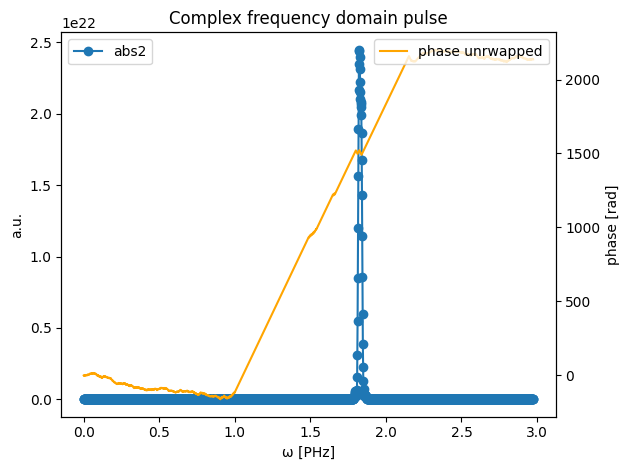

In [29]:
# Plot complex spectral field

fig, ax1 = plt.subplots()
ax1.set_title("Complex frequency domain pulse")
ax1.plot(ω.*1e-15, abs2.(Ẽω), label="abs2", marker="o")
#ax1.plot(ω.*1e-15, real.(Ẽω), label="real", marker="o")
#ax1.plot(ω.*1e-15, imag.(Ẽω), label="imaginary", marker="o")
ax2 = ax1.twinx()
#ax2.plot(ω.*1e-15.*1e-15, angle.(Ẽω), label="phase", color="orange")
ax2.plot(ω.*1e-15, unwrap(angle.(Ẽω)), label="phase unrwapped", color="orange")
#ax1.set_xlim(-500, 500)
ax1.set_xlabel("ω [PHz]")
ax1.set_ylabel("a.u.")
ax2.set_ylabel("phase [rad]")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.tight_layout()
# plt.show()
display(gcf())

In [30]:
# Nω = length(ω)
# Nt = 2*(Nω-1)

Et = FFTW.irfft(Ẽω, length(t))          # Et = E(t, z) ; REAL electic field amplitude in TIME domain INTEGRATED along r       #total time-domain real field amplitude across all radii
Ẽt = Maths.hilbert(Et)

It = abs2.(Ẽt)                   #  It = I(t, z); intensity in TIME domain, INTEGRATED along r [arbitrary units]


4096-element Vector{Float64}:
 1.3733703383422835e-6
 1.3314402309561046e-6
 1.2894850698330629e-6
 1.2481890303561727e-6
 1.2073358812703106e-6
 1.1667412991300807e-6
 1.1266350270489056e-6
 1.0873030191760336e-6
 1.0484679968669752e-6
 1.0100004042001842e-6
 ⋮
 1.740620163614981e-6
 1.7031960943825197e-6
 1.6641377165171889e-6
 1.6243541551830276e-6
 1.5838618332986165e-6
 1.5425424246817698e-6
 1.5006640730064191e-6
 1.458332623549552e-6
 1.4156941260201703e-6

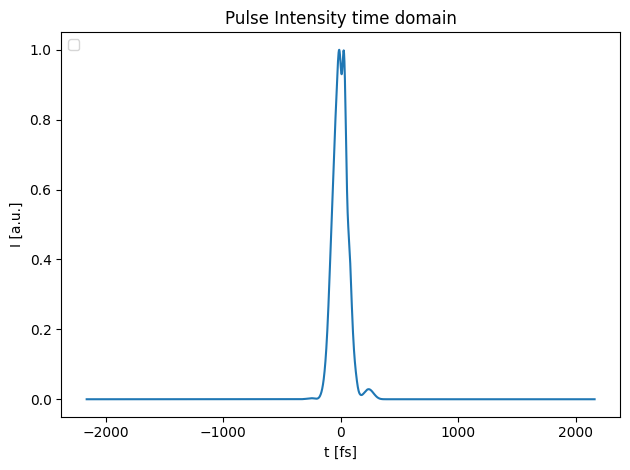

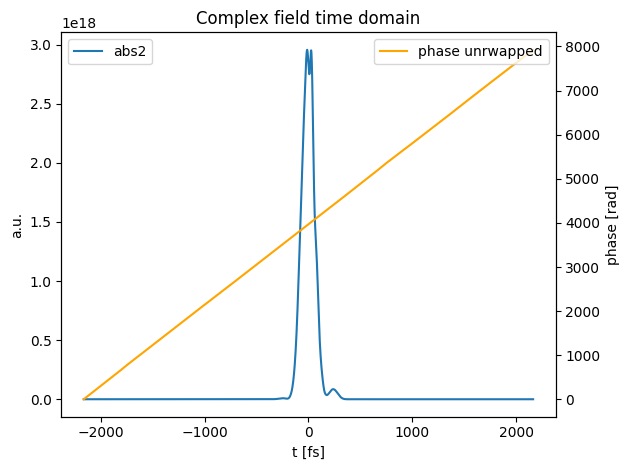

sys:1: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [31]:
# Plot complex time domain field

fig, ax1 = plt.subplots()
ax1.set_title("Pulse Intensity time domain")
ax1.plot(t.*1e15, Maths.normbymax(It))#, marker="o")
ax1.set_xlabel("t [fs]")
ax1.set_ylabel("I [a.u.]")
ax1.legend(loc="upper left")
plt.tight_layout()
display(gcf())

# Plot complex spectral field

fig, ax1 = plt.subplots()
ax1.set_title("Complex field time domain")
ax1.plot(t.*1e15, abs2.(Ẽt), label="abs2")#, marker="o")
#ax1.plot(t.*1e15, real.(Ẽt), label="real", marker="o")
#ax1.plot(t.*1e15, imag.(Ẽt), label="imaginary", marker="o")
ax2 = ax1.twinx()
#ax2.plot(t.*1e15, angle.(Ẽt), label="phase", color="orange")
ax2.plot(t.*1e15, unwrap(angle.(Ẽt)), label="phase unrwapped", color="orange")
#ax1.set_xlim(-500, 500)
ax1.set_xlabel("t [fs]")
ax1.set_ylabel("a.u.")
ax2.set_ylabel("phase [rad]")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.tight_layout()
display(gcf())

# plt.show()

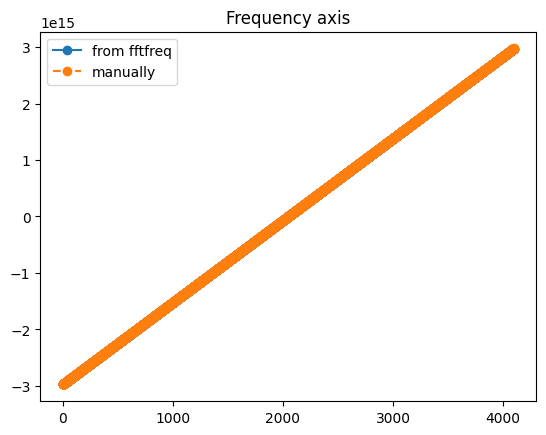

(4096,)
(4096,)
(4096,)


In [32]:
# COMPARING FREQUENCY AXIS USING FFTFREQ FUNCTION AND USING A MANUAL APPROACH

Nω = length(ω)
Nt = 2*(Nω-1)

# frequency axis from time axis using fftfreq
dt = t[2]-t[1]
println(size(t))

f_fftfreq = collect(FFTW.fftshift(FFTW.fftfreq(length(t), 1/dt)))
ω_fftfreq = 2*pi*f_fftfreq
println(size(ω_fftfreq))


# manually creating new frequency axis
# extend omega axis into negative frequencies
ω_n = reverse(-1.0.*ω[2:end-1])               #create negative part of omega axis (highest positive frequency is omitted in negative part)
ω_manually = vcat(ω_n, ω)[:,1]                      #join negative and positive part
println(size(ω_manually))



plt.figure()
plt.title("Frequency axis")
plt.plot(ω_fftfreq, label="from fftfreq", marker="o")
plt.plot(ω_manually, label="manually", linestyle="--", marker="o")
plt.legend()
# plt.show()
display(gcf())

# # extend omega axis into negative frequencies
# ω_n = reverse(-1.0.*ω_p[2:end-1])               #create negative part of omega axis (highest positive frequency is omitted in negative part)
# ω = vcat(ω_n, ω_p)[:,1]                      #join negative and positive part

# # prepare new time axis
# n_sample = size(ω, 1)
# δω = abs(ω[2]-ω[1])
# fs = 2*pi/δω

# t = collect(FFTW.fftshift(FFTW.fftfreq(n_sample, fs))) 

### PLOT MIRROR DATA

In [4]:
file_low_GDD_mir = joinpath("input", "mirrordata_0fs2.txt")
file_high_GDD_mir = joinpath("input", "mirrordata_-30fs2.txt")

data, header = readdlm(file_low_GDD_mir, '\t', header=true)

wl_low = data[:,1]
R_low = data[:,2]
GDD_low = data[:,3]


data, header = readdlm(file_high_GDD_mir, '\t', header=true)

wl_high = data[:,1]
R_high = data[:,2]
GDD_high = data[:,3]

251-element Vector{Float64}:
    274.602
    440.228
    633.096
    675.624
    288.78
   -409.266
   -796.979
   -692.267
   -414.619
   -191.07
      ⋮
  -1582.87
  -1927.75
  -2446.49
  -3360.49
  -5263.92
  -9981.52
 -24309.7
 -76885.0
 -98453.1

In [52]:
threshold = 98.0

first_idx = findfirst(x -> x > threshold, R_low)
last_idx = findlast(x -> x > threshold, R_low)

println(wl_low[first_idx])
println(R_low[first_idx])
println(wl_low[last_idx])

932.0
98.1862
1150.0


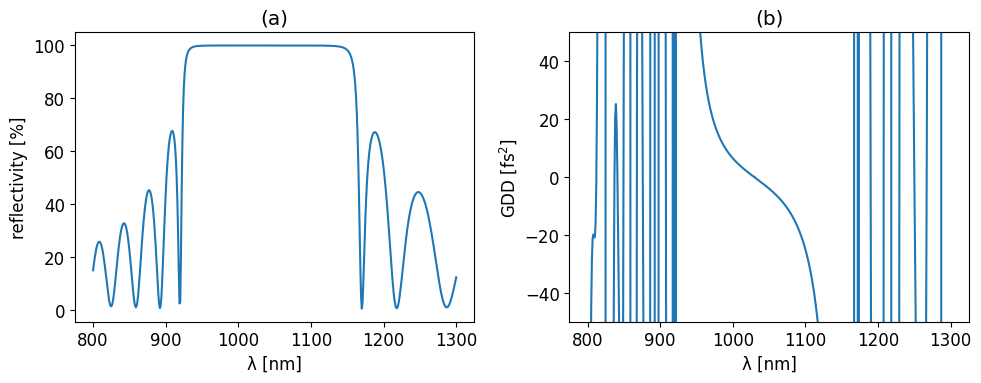

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

# Plot (a)
axs[1].plot(wl_low, R_low)
axs[1].set_title("(a)")
axs[1].set_xlabel("λ [nm]")
axs[1].set_ylabel("reflectivity [%]")

# Plot (b)
axs[2].plot(wl_low, GDD_low)
axs[2].set_title("(b)")
axs[2].set_xlabel("λ [nm]")
axs[2].set_ylabel("GDD [fs\$^2\$]")
# axs[2].set_xlim(925,1150)
axs[2].set_ylim(-50,50)

plt.tight_layout()
plt.savefig(joinpath("@__DIR__", "..", "..", "..", "thesis", "mirr_low_GDD.png"), dpi=300, bbox_inches="tight")
plt.gcf()

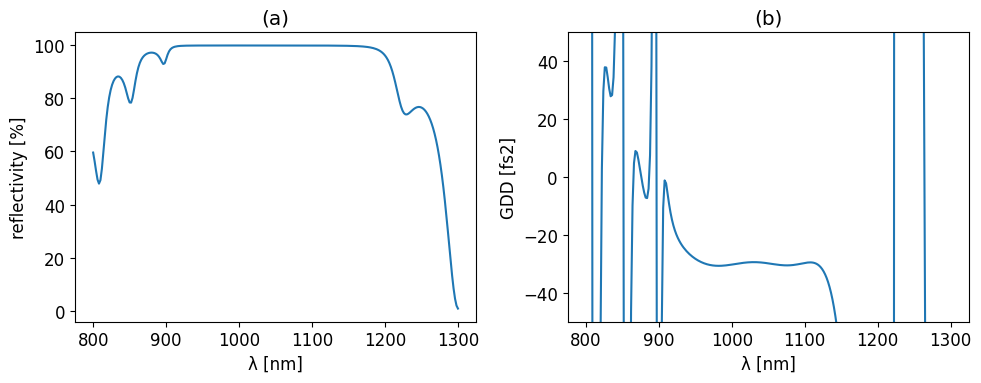

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

# Plot (a)
axs[1].plot(wl_high, R_high)
axs[1].set_title("(a)")
axs[1].set_xlabel("λ [nm]")
axs[1].set_ylabel("reflectivity [%]")

# Plot (b)
axs[2].plot(wl_high, GDD_high)
axs[2].set_title("(b)")
axs[2].set_xlabel("λ [nm]")
axs[2].set_ylabel("GDD [fs2]")
# axs[2].set_xlim(925,1150)
axs[2].set_ylim(-50,50)

plt.tight_layout()
plt.savefig(joinpath("@__DIR__", "..", "..", "..", "thesis", "mirr_high_GDD.png"), dpi=300, bbox_inches="tight")
plt.gcf()